In [1]:
# importing libraries 
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential, save_model, load_model
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
import numpy as np
from keras.callbacks import TensorBoard
import time
import matplotlib.pyplot as plt
import datetime
import cv2
import os
import tensorflow as tf
import tensorflow.keras
import cv2
print('tf version', tf.__version__)
print('keras version', tf.keras.__version__)
print('gpu is ','available' if tf.config.list_physical_devices('GPU') else 'not available')



tf version 2.4.1
keras version 2.4.0
gpu is  available


In [2]:
img_width, img_height = 80,80
NAME = 'Model3_CNN_{}'.format(datetime.datetime.now().strftime("%d.%m.%Y-%H_%M"))
train_data_dir = '/kaggle/input/plant-disease-recognition-dataset/Train/Train/'
validation_data_dir = '/kaggle/input/plant-disease-recognition-dataset/Test/Test/'
eval_data_dir = '/kaggle/input/plant-disease-recognition-dataset/Validation/Validation/'


nb_train_samples = 1322
nb_validation_samples = 150
nb_eval_samples = 60 
epochs = 100
batch_size = 128
num_of_class = 3

In [3]:
train_datagen = ImageDataGenerator( #Image Augmentation # Research on other parameters
                rescale = 1. / 255, 
                shear_range = 0.25, 
                zoom_range = 0.25,
                rotation_range=10) 
  
test_datagen = ImageDataGenerator(rescale = 1. / 255) #Image Augmentation


  
train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                    target_size =(img_width, img_height), 
                                                    batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                    shuffle=False)
  
validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                                        target_size =(img_width, img_height), 
                                                        batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                        shuffle=False) 

eval_generator = test_datagen.flow_from_directory(eval_data_dir, 
                                                  target_size =(img_width, img_height), 
                                                  batch_size = batch_size, class_mode ='categorical',color_mode='rgb', #grayscale
                                                  shuffle=False)


Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


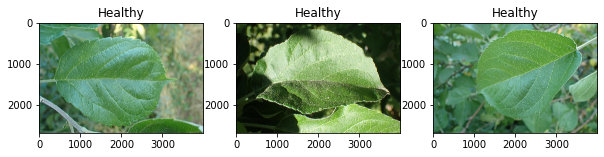

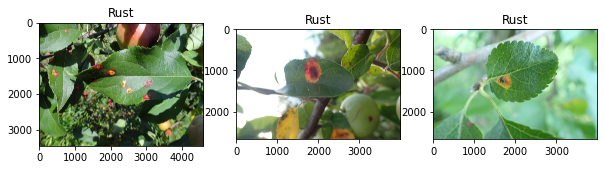

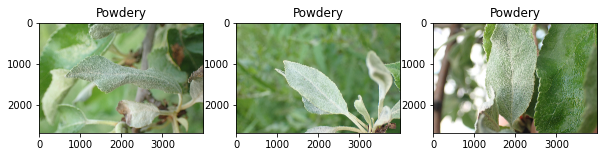

In [4]:
import random

def rescale_and_plot_images(image_files,class_name):
    for idx, img_path in enumerate(image_files):
        plt.subplot(3, 3, idx + 1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap = 'gray')
        plt.title(class_name)

def plot_images(path, class_name):
    image_paths = []
    class_name_path = os.path.join(path, class_name)
    image_paths = [os.path.join(class_name_path, img_png) for img_png in random.sample(os.listdir(class_name_path), 3)]
    
    plt.figure(figsize = (10, 25))
    rescale_and_plot_images(image_paths,class_name)
    

plot_images(train_data_dir, 'Healthy')
plot_images(train_data_dir, 'Rust')
plot_images(train_data_dir, 'Powdery')

In [5]:

    
input_shape = (img_width, img_height, 3) 

model3 = Sequential()

model3.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu',data_format='channels_last'))
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(64, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)

model3.add(Conv2D(128, (3,3), activation='relu'),)
model3.add(MaxPooling2D((2,2), strides=(1,1), padding='same'),)
# model3.add(Dropout(0.15))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))

model3.add(Dropout(0.5))
model3.add(Dense(num_of_class, activation='softmax'))

In [6]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 78, 78, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 76, 76, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 76, 76, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 700928)            0

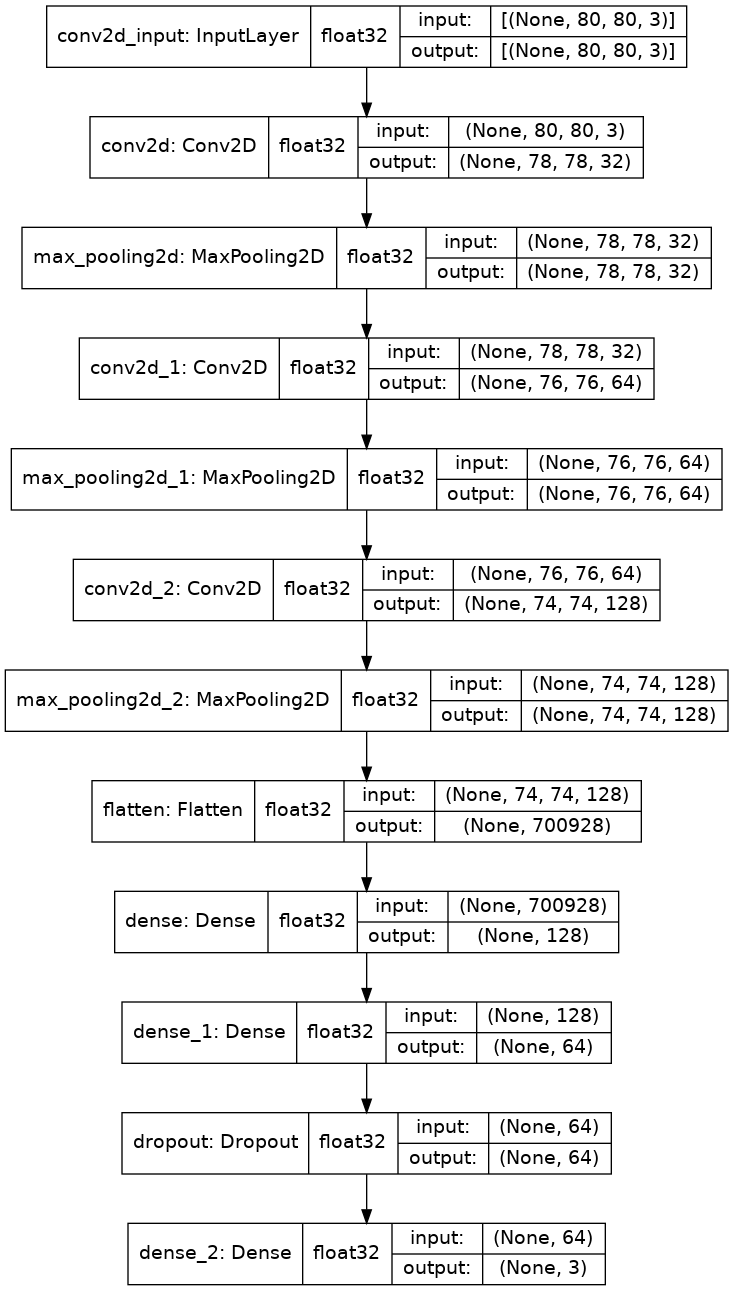

In [7]:
keras.utils.plot_model(
    model3,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [8]:
model3.compile(loss ='categorical_crossentropy',
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [9]:

H = model3.fit_generator(train_generator,
    steps_per_epoch = nb_train_samples // batch_size, 
    epochs = epochs, validation_data = validation_generator, 
    validation_steps = nb_validation_samples // batch_size) 


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
10/10 [==============================] - 236s 23s/step - loss: 147.8858 - accuracy: 0.2318 - val_loss: 1.1451 - val_accuracy: 0.2266
Epoch 2/100
10/10 [==============================] - 180s 18s/step - loss: 1.1369 - accuracy: 0.3350 - val_loss: 1.0823 - val_accuracy: 0.4219
Epoch 3/100
10/10 [==============================] - 181s 18s/step - loss: 1.0920 - accuracy: 0.3851 - val_loss: 1.0869 - val_accuracy: 0.2422
Epoch 4/100
10/10 [==============================] - 181s 18s/step - loss: 1.1091 - accuracy: 0.2828 - val_loss: 1.0935 - val_accuracy: 0.2578
Epoch 5/100
10/10 [==============================] - 183s 18s/step - loss: 1.1289 - accuracy: 0.4465 - val_loss: 1.3212 - val_accuracy: 0.3906
Epoch 6/100
10/10 [==============================] - 181s 18s/step - loss: 1.4155 - accuracy: 0.2223 - val_loss: 1.0847 - val_accuracy: 0.3359
Epoch 7/100
10/10 [==============================] - 185s 19s/step - loss: 1.1045 - accuracy: 0.2888 - val_loss: 1.0986 - val_accuracy: 0.39

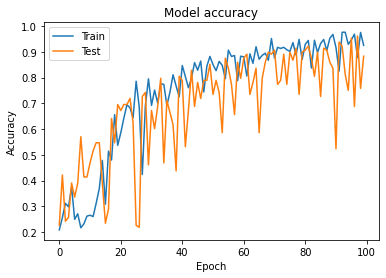

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
fig, ax = plt.subplots(1,1)
plt.plot(H.history["accuracy"])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


fig.savefig('./'+'model1_train_test_accuracy.jpeg',dpi=93)

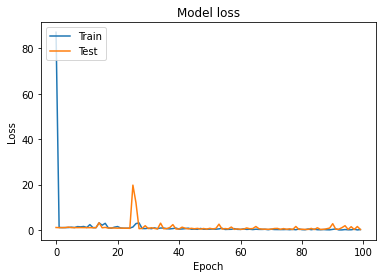

In [12]:
# Plot training & validation loss values
fig, ax = plt.subplots(1,1)
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('./'+'model1_train_test_los.jpeg',dpi=93)

In [13]:
model3.save('./'+NAME+'.hdf5')

In [14]:
validation_generator.class_indices

{'Healthy': 0, 'Powdery': 1, 'Rust': 2}

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

     Healthy       0.85      0.55      0.67        20
     Powdery       0.67      1.00      0.80        20
        Rust       1.00      0.85      0.92        20

    accuracy                           0.80        60
   macro avg       0.84      0.80      0.80        60
weighted avg       0.84      0.80      0.80        60



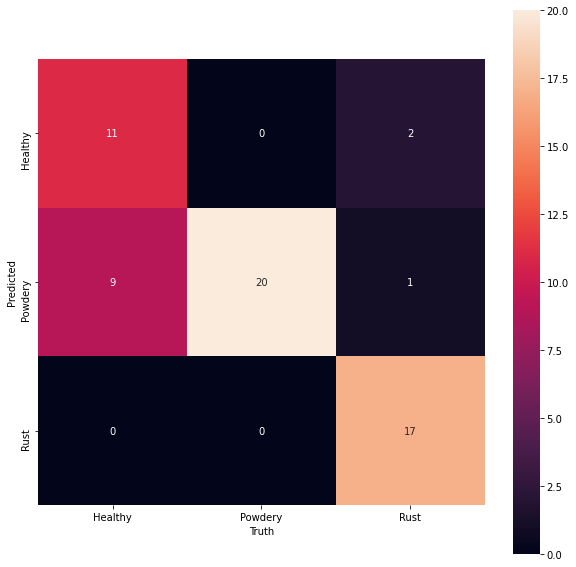

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
target_names=['Healthy','Powdery','Rust']

Y_pred = model3.predict_generator(eval_generator, nb_eval_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(eval_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onEval.jpeg',dpi=93)

print('Classification Report')
report = classification_report(eval_generator.classes, y_pred, target_names=target_names)
print(report)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

     Healthy       0.93      0.76      0.84        50
     Powdery       0.77      0.96      0.86        50
        Rust       0.98      0.92      0.95        50

    accuracy                           0.88       150
   macro avg       0.89      0.88      0.88       150
weighted avg       0.89      0.88      0.88       150



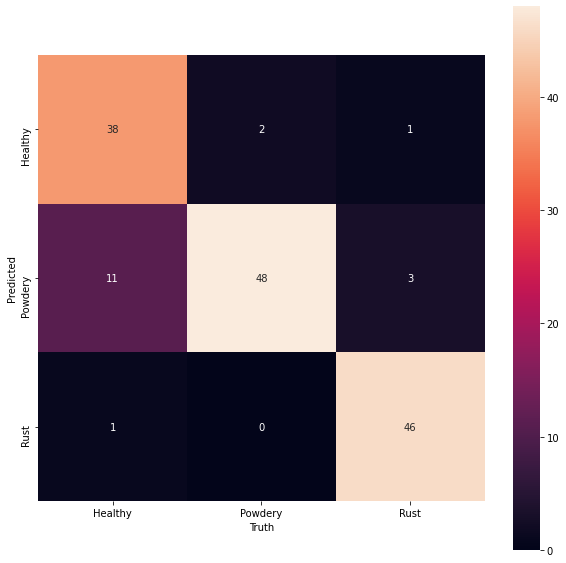

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


Y_pred = model3.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


plt.figure(figsize=(10,10))
cm = confusion_matrix(validation_generator.classes, y_pred)
_=sns.heatmap(cm.T, annot=True, fmt='d', cbar=True, square=True, xticklabels=target_names,
             yticklabels=target_names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.savefig('./'+'confusion_matrix_onValidation.jpeg',dpi=93)

print('Classification Report')
report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(report)